In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    # check if tx^t * tx is invertible
    xx = np.dot(np.matrix.transpose(tx), tx)
    
    try:
        inv_xx = np.linalg.inv(xx)
    except:
        raise ValueError('Matrix xx is not invertible')
    
    w = np.matrix.dot(np.matrix.dot(inv_xx, np.matrix.transpose(tx)), y)
    loss = compute_cost(y, tx, w)
    
    return loss, w[0], w[1]

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=100)

    # Start the grid search
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    loss_LSE, w0_star_LSE, w1_star_LSE = least_squares(y, tx)
    
    print('w0, w1 & loss of grid search')
    print(w0_star, w1_star, loss_star)
    print('w0, w1 & loss of LSE')
    print(w0_star_LSE, w1_star_LSE, loss_LSE)
          
    if (w0_star == w0_star_LSE) & (w1_star == w1_star_LSE):
        return 1
    else:
        return 0

test_your_least_squares()

NameError: name 'compute_cost' is not defined

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
print(x)
print(y)

[ 0.35237491  4.8951233   1.86662437  3.50706129  3.38087384  0.73093728
  3.88562366  5.65224803  6.28318531  2.37137419  0.60474982  3.63324875
  0.85712473  2.49756165  1.61424946  5.39987312  6.15699785  6.0308104
  0.47856237  2.87612401  4.51656093  0.98331219  1.10949964  0.1
  2.11899928  1.36187455  4.01181111  5.77843549  4.26418602  1.2356871
  2.24518674  1.99281183  1.48806201  4.64274839  4.39037348  3.00231147
  0.22618746  5.27368567  5.02131076  5.52606058  2.6237491   4.76893584
  3.12849893  1.74043692  3.7594362   3.25468638  5.90462294  4.13799857
  2.74993656  5.14749821]
[  8.95549970e-02  -1.28027608e+00   1.28930361e+00  -2.68157012e-01
  -2.06807030e-01   5.38669461e-01  -4.84226326e-01  -1.05814170e+00
   2.22695473e-01   1.94693837e-01   4.37144573e-01  -3.01041920e-01
   4.25144932e-01   3.76102400e-02   8.33364051e-01  -4.37345163e-01
  -1.41108000e-04  -3.08575746e-01   7.22554859e-01  -3.72595292e-01
  -7.37222919e-01   9.51211821e-01   6.05998553e-01   

In [6]:
np.zeros((x.shape[0], degree))

NameError: name 'degree' is not defined

In [7]:
def build_poly(x, degree):
    """polynomial basis function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    
    #create the matrix tx
    tx = np.ones((x.shape[0], degree+1))
    for i in range(x.shape[0]):
        for j in range(degree+1):
            tx[i, j] = np.power(x[i],j)
    return tx
build_poly(x, 2)

array([[  1.00000000e+00,   3.52374910e-01,   1.24168077e-01],
       [  1.00000000e+00,   4.89512330e+00,   2.39622321e+01],
       [  1.00000000e+00,   1.86662437e+00,   3.48428655e+00],
       [  1.00000000e+00,   3.50706129e+00,   1.22994789e+01],
       [  1.00000000e+00,   3.38087384e+00,   1.14303079e+01],
       [  1.00000000e+00,   7.30937276e-01,   5.34269301e-01],
       [  1.00000000e+00,   3.88562366e+00,   1.50980712e+01],
       [  1.00000000e+00,   5.65224803e+00,   3.19479078e+01],
       [  1.00000000e+00,   6.28318531e+00,   3.94784176e+01],
       [  1.00000000e+00,   2.37137419e+00,   5.62341557e+00],
       [  1.00000000e+00,   6.04749821e-01,   3.65722346e-01],
       [  1.00000000e+00,   3.63324875e+00,   1.32004965e+01],
       [  1.00000000e+00,   8.57124731e-01,   7.34662804e-01],
       [  1.00000000e+00,   2.49756165e+00,   6.23781420e+00],
       [  1.00000000e+00,   1.61424946e+00,   2.60580133e+00],
       [  1.00000000e+00,   5.39987312e+00,   2.9158629

Let us play with polynomial regression. Note that we will use your implemented function `compute_cost`. Please copy and paste your implementation from exercise02.

[ 0.83431835 -0.28976617]
Processing 1th experiment, degree=1, rmse=0.47187607963421874
[-0.11521169  1.58466469 -0.76372992  0.08215316]
Processing 2th experiment, degree=3, rmse=0.25858277667737506
[  3.22356377e-01  -4.05990189e-01   1.64303561e+00  -1.12131786e+00
   2.72479655e-01  -2.25108708e-02  -7.79999739e-04   1.53902687e-04]
Processing 3th experiment, degree=7, rmse=0.2496587036090866
[  3.19721837e-01  -3.61959887e+00   1.38778365e+01  -2.05534274e+01
   1.37198600e+01  -1.12607586e+00  -4.54650638e+00   3.38835200e+00
  -1.22299130e+00   2.58271181e-01  -3.24533340e-02   2.25274180e-03
  -6.66330347e-05]
Processing 4th experiment, degree=12, rmse=0.2989996031513126


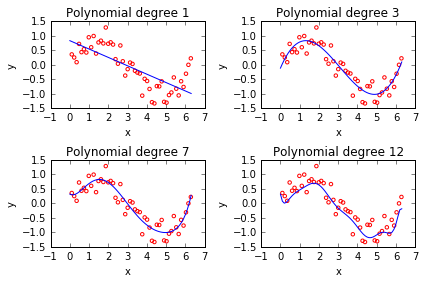

In [9]:
from plots import *
from grid_search import *

def polynomial_regression():
    """The entry."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        
        tx = build_poly(x, degree)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        
        xx = np.dot(np.matrix.transpose(tx), tx)
        xy = np.dot(np.matrix.transpose(tx), y)
        
        weight = np.dot(np.linalg.inv(xx), xy)
        
        print(weight)
        mse = compute_cost(y, tx, weight)
        rmse = np.sqrt(2*mse)
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_row][ind % num_row])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [ ]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [ ]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

# Ridge Regression
Please fill in the function below.

In [ ]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    raise NotImplementedError

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)